# Data analysis with python

## Index

1. [Importing libraries](#1)
1. [loading dataset](#2)
1. [define objectives](#3)
1. [data cleaning](#5)
1. [data analysis](#6)
1. [data interpretation and visuasilation](#7)
1. [classification model for IRIS dataset](#9)

## <a id="1">importing Libraries</a>

In [37]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind, norm, zscore

We will be using following libraries:

- pandas to work with tabular data
- scikit learn to get toy datasets and classification models
- numpy for scientific calculations

## <a id="2">Loading Dataset</a>

We are going to explore the iris dataset and analyse it using stastical tools

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['type'] = iris.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

## <a id="3">Define Objectives</a>

We want to study the relationship between the type of iris and the dimensions of their sepals and petals.

## <a id="5">Data cleaning</a>

- find and remove duplicate values
- handle null values
- remove outliers

<Axes: >

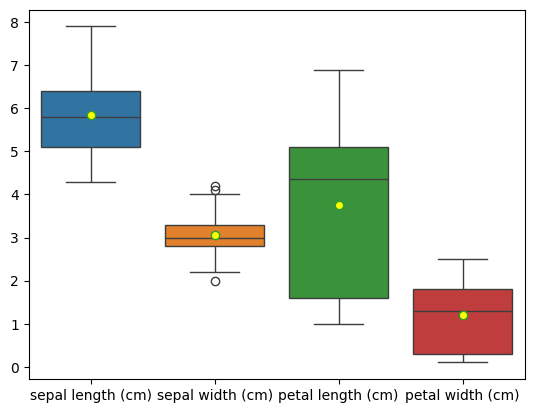

In [41]:
sns.boxplot(df.iloc[:,:-2], showmeans=True, meanprops={"marker":"o", "markerfacecolor":"yellow"})

we have identified outliers in the `sepal width`

In [42]:
z_scores = zscore(df.iloc[:, :-2])

In [43]:
z_scores.max()

sepal length (cm)    2.474106
sepal width (cm)     2.722820
petal length (cm)    1.783705
petal width (cm)     1.710975
dtype: float64

### Find duplicate values

In [15]:
duplicate = df[df.duplicated()]
duplicate

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
142,5.8,2.7,5.1,1.9,2,virginica


In [16]:
df = df.drop_duplicates()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


The IRIS dataset contained a duplicate row and we removed it using a pandas dataframe `drop_duplicates()` method

## <a id="6">Data analysis</a>

we will perform following studies on the given data
- find correlation between variables
- draw insights
- find patterns and trends
- classification

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   type               149 non-null    int64  
 5   species            149 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.1+ KB


In [18]:
df.iloc[:,:-2].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


<Axes: >

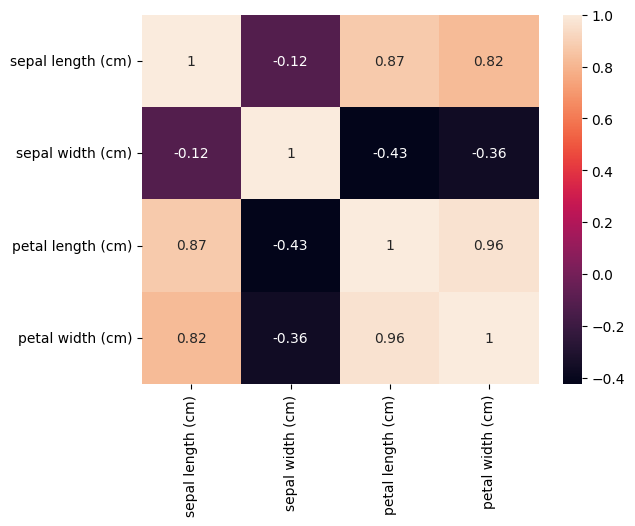

In [19]:
correlation = df.iloc[:,:-2].corr()
sns.heatmap(correlation, annot=True)

## <a id="7">data interpretation and visualisation</a>

In [20]:
def plot_violin(y2,i):
    plt.subplot(2,2,i)
    
    sns.violinplot(x='species',y= y2, data=df)

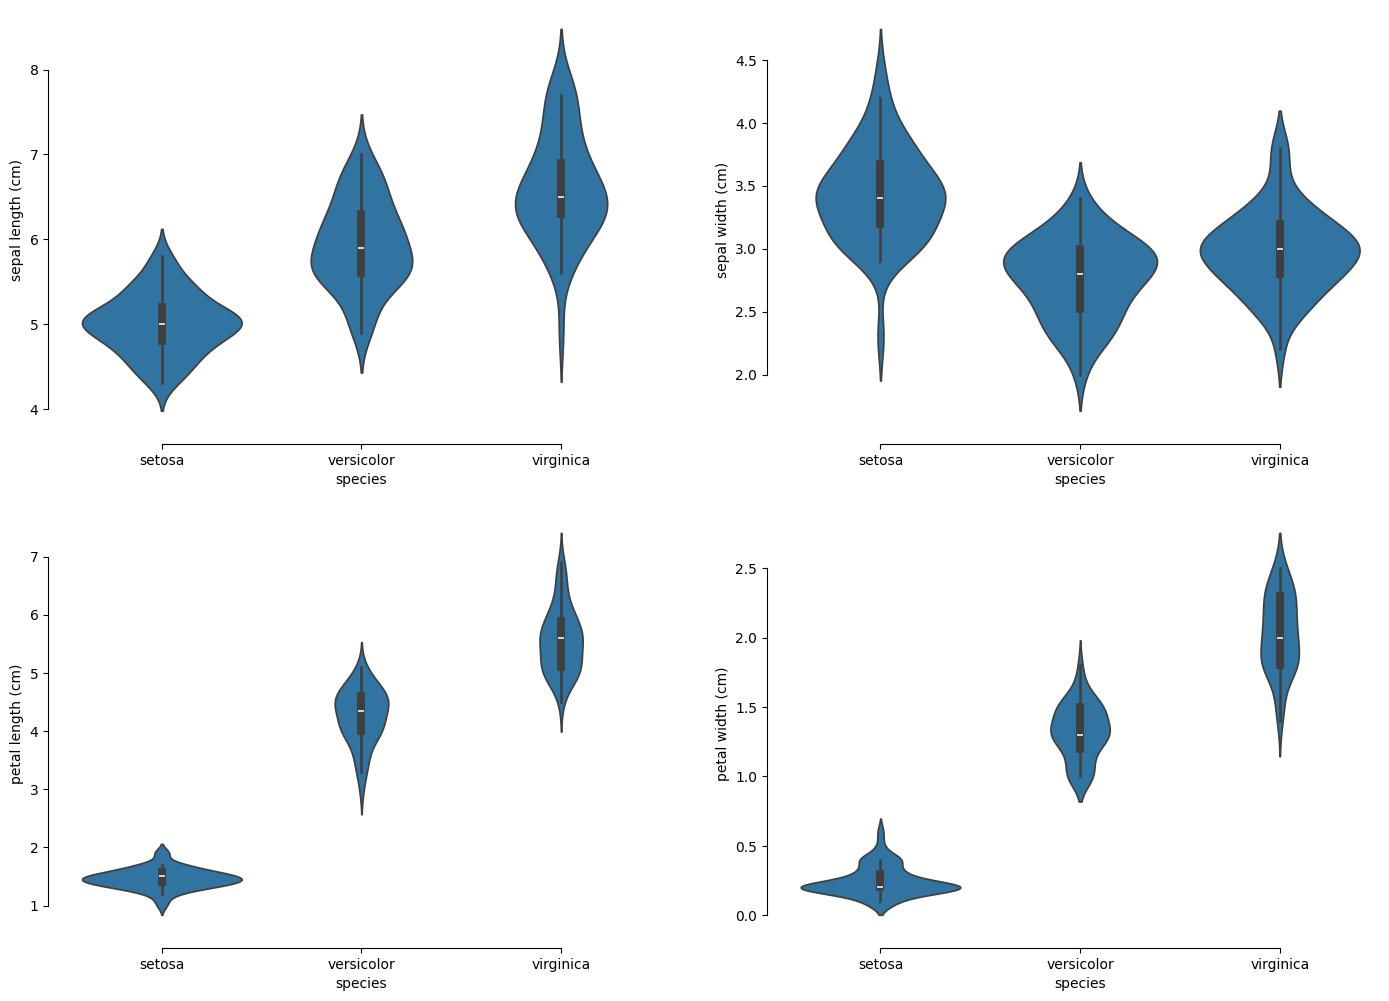

In [21]:
plt.figure(figsize=(17,12))
i = 1
for measurement in df.columns[:-2]:
    plot_violin(measurement,i)
    sns.despine(offset=10, trim=True)
    i += 1

## Hypothesis testing

In [22]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,species
0,5.1,3.5,1.4,0.2,0,setosa
65,6.7,3.1,4.4,1.4,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
44,5.1,3.8,1.9,0.4,0,setosa
113,5.7,2.5,5.0,2.0,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
133,6.3,2.8,5.1,1.5,2,virginica
81,5.5,2.4,3.7,1.0,1,versicolor
122,7.7,2.8,6.7,2.0,2,virginica
23,5.1,3.3,1.7,0.5,0,setosa


In [23]:
def iris_t_test(species1, species2, feature):
    species1_data = df[df["species"] == species1][feature]
    species2_data = df[df["species"] == species2][feature]

    if species1_data.isna().sum() > 0 or species2_data.isna().sum() > 0:
        raise ValueError("Data contains NaN values. Please clean the data before performing the T-test.")
    
    if len(species1_data) == 0 or len(species2_data) == 0:
        raise ValueError("One or both groups have no data points.")
    
    if species1_data.nunique() == 1 or species2_data.nunique() == 1:
        raise ValueError("One or both groups have identical data points, leading to zero variance.")
    t_stat, p_value = stats.ttest_ind(species1_data, species2_data, equal_var=False)

    return t_stat, p_value

In [24]:
species_list = ['setosa', 'versicolor', 'virginica']
features_list = iris.feature_names

results = []

for i in range(len(species_list)):
    for j in range(i + 1, len(species_list)):
        species1 = species_list[i]
        species2 = species_list[j]
        for feature in features_list:
            t_stat, p_value = iris_t_test(species1, species2, feature)
            null_hypothesis_rejected = p_value < 0.05
            result = {
                'species 1': species1,
                'species 2': species2,
                'feature': feature,
                'null hypothesis rejected': null_hypothesis_rejected,
                'pval': p_value,
                'tval': t_stat
            }
            results.append(result)

results_df = pd.DataFrame(results)

results_df

,species 1,species 2,feature,null hypothesis rejected,pval,tval
0,setosa,versicolor,sepal length (cm),True,3.746743e-17,-10.520986
1,setosa,versicolor,sepal width (cm),True,2.484228e-15,9.454976
2,setosa,versicolor,petal length (cm),True,9.934433e-46,-39.492719
3,setosa,versicolor,petal width (cm),True,2.717008e-47,-34.080342
4,setosa,virginica,sepal length (cm),True,4.585755e-25,-15.493178
5,setosa,virginica,sepal width (cm),True,7.780707e-09,6.336397
6,setosa,virginica,petal length (cm),True,1.218171e-48,-49.492077
7,setosa,virginica,petal width (cm),True,4.896936e-47,-42.171131
8,versicolor,virginica,sepal length (cm),True,1.122667e-07,-5.753540
9,versicolor,virginica,sepal width (cm),True,1.481667e-03,-3.271851


## <a id="8">classification model for IRIS dataset</a>

In [25]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = df['species']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluating model

In [28]:
y_pred = knn.predict(X_test)

In [29]:
print(f'model accuracy with k=3 is: {knn.score(X_test, y_test)}')

model accuracy with k=3 is: 0.9736842105263158
